# Quantitative methods - part 1

Today we are going to perform basic statistical analysis of scrapped data and visualize their distributions.

## Terms

For better understanging the topic, firstly let's introduce some terminology used when talking about statistical analysis.

### Population

A population is a set of similar items or events which is of interest for some question or experiment. It is the entire group you want to draw conclusions about.

The number of elements, which belong to population, is usually denoted with $N$.

Examples:

* the number of citizens living in California represents a population of the state
* all the chess players who have FIDE rating represents the population of the chess fraternity of the world
* the number of planets in the entire universe represents the planet population of the entire universe


### Sample

A sample is a subset of individuals from within a statistical population to estimate characteristics of the whole population. 

Examples:

 * 1000 people met randomly on streets of California cities is a sample of California population
 * 100 chess players randomly selected from FIDE rating list is a sample of chess players
 * planets from the Solar system is a sample of planets in the universe

Process of selecting samples from population is called sampling. The main problem, statisticians struggle, is to collect samples that are representative for the entire population. For instance planets from the Solar system are not quite representative for all planets in the universe.

### Distribution

A distribution in statistics is a function that shows the possible values for a variable and how often they occur.
A variable can be:

* discrete - adopt values of a given numerical set, that is, it only acquires values from a set, not just any value (e.g. number of apples in the box)
* continuous - acquire any value in an interval, there are always existing intermediate values between two observable value (e.g mass of apples in the box)

A histogram is a way to approximately represent the distribution of numerical data.

## Basic statistical analysis

### Input - loading data

During the classes we will work on the numerical data obtained from YouTube and Twitter. The first step is to load the previously scraped data. I recommend to put working files in subdirectory `data_scraped` and read them as follows:

In [1]:
# importing pandas to get access for its methods
import pandas as pd

# reading json files
youtube_data_civilis = pd.read_json('data_scraped/historia_civilis_metadata.json')
youtube_data_buffs = pd.read_json('data_scraped/history_buffs_london_metadata.json')

Here we used library Pandas, which has many builtin utilities for reading files and storing the content in Pandas Data Frames (similar to tables in Excel). Data is stored in objects with descriptive names (e.g. `youtube_data_civilis`). After loading data it is always a good idea to check a size of the table and a few rows to inspect the format of data. You can achieve this using the following code:

In [2]:
youtube_data_civilis.shape  # shows number of rows and columns in table

(81, 11)

In [3]:
youtube_data_civilis[0:5]  # shows first five rows

,id,title,author,description,keywords,thumbnail,published_at,channel_id,duration,view_count,like_count
0,OGJHE6O7Mhk,The Congress of Vienna (Part 2) (1814 to 1815),Historia Civilis,Patreon | http://historiacivilis.com/patreon\n...,"[Historia Civilis, History, The Congress of Vi...",https://i.ytimg.com/vi/OGJHE6O7Mhk/hqdefault.j...,2022-04-02,UCv_vLHiWVBh_FR9vbeuiY-A,3072,618838,29819
1,QtOXq9SwarQ,The Congress of Vienna (Part 1) (1814),Historia Civilis,Patreon | http://historiacivilis.com/patreon\n...,"[Historia Civilis, History, Metternich, Castle...",https://i.ytimg.com/vi/QtOXq9SwarQ/maxresdefau...,2022-01-29,UCv_vLHiWVBh_FR9vbeuiY-A,2806,1247060,42165
2,CH1oYhTigyA,Peace...? (1814),Historia Civilis,Patreon | http://historiacivilis.com/patreon\n...,[Historia Civilis],https://i.ytimg.com/vi/CH1oYhTigyA/maxresdefau...,2021-07-18,UCv_vLHiWVBh_FR9vbeuiY-A,1159,651466,37789
3,POHNhn3WcCc,Antony's Invasion of Parthia (42 to 33 B.C.E.),Historia Civilis,Patreon | http://historiacivilis.com/patreon\n...,[],https://i.ytimg.com/vi/POHNhn3WcCc/maxresdefau...,2021-04-24,UCv_vLHiWVBh_FR9vbeuiY-A,1824,962848,34896
4,8rt67AqrR74,Sextus Pompeius and the Sicilian War (42 to 36...,Historia Civilis,Patreon | http://historiacivilis.com/patreon\n...,"[Historia Civilis, Ancient Rome, Octavian, Aug...",https://i.ytimg.com/vi/8rt67AqrR74/maxresdefau...,2021-01-16,UCv_vLHiWVBh_FR9vbeuiY-A,2291,1216442,39687


You can also check the whole Data Frame, which usually is very long (so it is not really convienient):

In [ ]:
youtube_data_buffs

,id,title,author,description,keywords,thumbnail,published_at,channel_id,duration,view_count,like_count
0,ONpEHXEtTPc,History Buffs: Narcos Season One - Part Two,History Buffs,You can join Nebula today and get Curiosity St...,"[pablo escobar, wagner moura, nick hodges, his...",https://i.ytimg.com/vi/ONpEHXEtTPc/hqdefault.j...,2022-04-17,UCggHoXaj8BQHIiPmOxezeWA,2183,607037,29358
1,9gPBVdNhfCI,History Buffs: Narcos Season One - Part One,History Buffs,You can join Nebula today and get Curiosity St...,"[pablo escobar, wagner moura, history buffs, p...",https://i.ytimg.com/vi_webp/9gPBVdNhfCI/maxres...,2022-04-10,UCggHoXaj8BQHIiPmOxezeWA,2424,919260,37777
2,ATF5ju0rpE4,History Buffs: The Last of the Mohicans,History Buffs,"Hey guys, hope everyone is doing well. For thi...","[History Buffs, Nick Hodges, The Last of the M...",https://i.ytimg.com/vi/ATF5ju0rpE4/maxresdefau...,2021-11-06,UCggHoXaj8BQHIiPmOxezeWA,3136,1259957,42604
3,uZGGn2ZfGZo,History Buffs: Midway Part Two,History Buffs,As promised here is Part Two of my Midway revi...,"[History Buffs, Nick Hodges, Midway, Midway Pa...",https://i.ytimg.com/vi/uZGGn2ZfGZo/maxresdefau...,2021-05-28,UCggHoXaj8BQHIiPmOxezeWA,2124,2026634,60026
4,4qQim09n6mY,History Buffs: Midway Part One,History Buffs,Thank you guys so much for your patience. Quar...,"[History Buffs, Nick Hodges, Midway, Pearl Har...",https://i.ytimg.com/vi/4qQim09n6mY/maxresdefau...,2021-05-21,UCggHoXaj8BQHIiPmOxezeWA,1863,2405777,63462
...,...,...,...,...,...,...,...,...,...,...,...
81,6ABJVrRfr2Q,History Buffs: We Were Soldiers,History Buffs,https://www.facebook.com/HistoryBuffsLondon\nh...,"[History (TV Genre), History Buffs, We Were So...",https://i.ytimg.com/vi_webp/6ABJVrRfr2Q/maxres...,2015-08-01,UCggHoXaj8BQHIiPmOxezeWA,1519,4668980,65311
82,HC4o_pT9de8,What bothers me in Historical Movies,History Buffs,Next episode of History Buffs will be uploaded...,"[History Buffs, History Buffs Podcast]",https://i.ytimg.com/vi_webp/HC4o_pT9de8/maxres...,2015-07-27,UCggHoXaj8BQHIiPmOxezeWA,593,123699,3669
83,OALs9xWvhlo,Hb Update 21st July 2015,History Buffs,https://www.facebook.com/HistoryBuffsLondon,[History Buffs],https://i.ytimg.com/vi_webp/OALs9xWvhlo/maxres...,2015-07-21,UCggHoXaj8BQHIiPmOxezeWA,446,11108,374
84,DVAxzf1HdH4,History Buffs: Gladiator,History Buffs,https://www.facebook.com/HistoryBuffsLondon\nh...,"[Gladiator (Profession), film review, movie re...",https://i.ytimg.com/vi_webp/DVAxzf1HdH4/maxres...,2015-07-18,UCggHoXaj8BQHIiPmOxezeWA,1329,4393772,70170


To extract a particular column from the table, you can use dot notation and name of the column:

In [4]:
youtube_data_buffs.title

0     History Buffs: Narcos Season One - Part Two
1     History Buffs: Narcos Season One - Part One
2         History Buffs: The Last of the Mohicans
3                  History Buffs: Midway Part Two
4                  History Buffs: Midway Part One
                         ...                     
81                History Buffs: We Were Soldiers
82           What bothers me in Historical Movies
83                       Hb Update 21st July 2015
84                       History Buffs: Gladiator
85                            History Buffs: Zulu
Name: title, Length: 86, dtype: object

### Data visualization

#### Histogram

To construct a histogram, the first step is to "bin" the range of values, that is, divide the entire range of values into a series of intervals and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1. 

Choice of number of bins is arbitrary and different bin sizes can reveal different features of the data. The often used rule of thumb is to choose number of bins equal to square root on number of samples, rounded to the next integer (e.g. for $N=70$ samples, number of bins is $k=\lceil \sqrt{70} \rceil=\lceil8.3666...\rceil=9$)

Pandas library has builtin methods for plotting histogram of data in columns. As an example let's consider duration of the videos from two channels:

<AxesSubplot:>

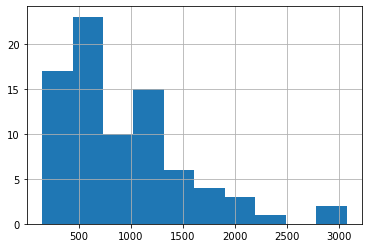

In [5]:
youtube_data_civilis.duration.hist(bins=10)  # number of bins passed to parameter `bins`

<AxesSubplot:>

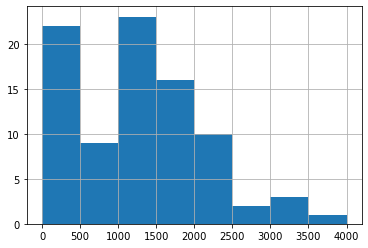

In [6]:
youtube_data_buffs.duration.hist(bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])  # bin ranges passed to parameter bins

In the second case, methods `min` and `max` are useful to determine proper range of bins - range of bins should be at least the same or broader than range of actual data:

In [7]:
youtube_data_buffs.duration.min()  # minimal value from column

89

In [8]:
youtube_data_buffs.duration.max()  # maximal value from column

3884

For comparing two or more distributions it is convienient to use the same bin ranges, and plot histograms on the same figure:

Text(0.5, 1.0, 'duration')

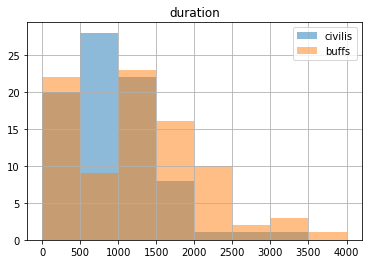

In [9]:
# importing numpy to get access to its methods
import numpy as np
# importing pyplot for more options with plots
import matplotlib.pyplot as plt


# make 8 bins of width 500 from 0 to 4000
bin_ranges = np.linspace(0, 4000, 9)  # shorthand for [   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]
transparency = 0.5

# plot with the same bin ranges and with transparency and labels
youtube_data_civilis.duration.hist(bins=bin_ranges, alpha=transparency, label="civilis")
youtube_data_buffs.duration.hist(bins=bin_ranges, alpha=transparency, label="buffs")

# plotting legend
plt.legend()

# adding title
plt.title("duration")

Text(0.5, 1.0, 'view_count')

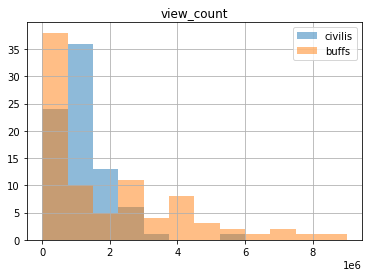

In [10]:
bin_ranges = np.linspace(0, 9000000, 13)
transparency = 0.5

youtube_data_civilis.view_count.hist(bins=bin_ranges, alpha=transparency, label="civilis")
youtube_data_buffs.view_count.hist(bins=bin_ranges, alpha=transparency, label="buffs")

plt.legend()
plt.title("view_count")

Text(0.5, 1.0, 'like_count')

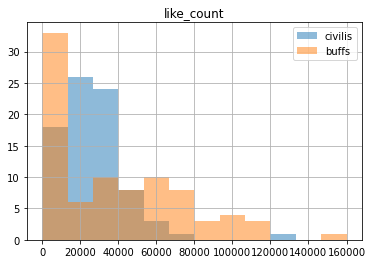

In [11]:
bin_ranges = np.linspace(0, 160000, 13)
transparency = 0.5

youtube_data_civilis.like_count.hist(bins=bin_ranges, alpha=transparency, label="civilis")
youtube_data_buffs.like_count.hist(bins=bin_ranges, alpha=transparency, label="buffs")

plt.legend()
plt.title("like_count")

The visual reprezentation of distributions is very useful for getting some first general information. However to draw any conclusions we need more strict metrics.

### Center

A central tendency is a central or typical value for a distribution. Occasionally authors use central tendency to denote "the tendency of quantitative data to cluster around some central value."

#### Mean

An arithmetic mean is the sum of a collection of numbers divided by the count of numbers in the collection. While the arithmetic mean is often used to report central tendencies, it is not a robust statistic, meaning that it is greatly influenced by outliers (values that are very much larger or smaller than most of the values). To compute mean value of column, the method `mean` is used:

In [12]:
# here print statements and f-strings are used for pretties formating of output
print("duration:")
print(f"  civilis: {youtube_data_civilis.duration.mean():.1f}")
print(f"  buffs: {youtube_data_buffs.duration.mean():.1f}")
print("view_count:")
print(f"  civilis: {youtube_data_civilis.view_count.mean():.1f}")
print(f"  buffs: {youtube_data_buffs.view_count.mean():.1f}")
print("like_count:")
print(f"  civilis: {youtube_data_civilis.like_count.mean():.1f}")
print(f"  buffs: {youtube_data_buffs.like_count.mean():.1f}")

duration:
  civilis: 927.6
  buffs: 1296.9
view_count:
  civilis: 1247198.5
  buffs: 1925367.7
like_count:
  civilis: 27573.2
  buffs: 37459.7


We can see that *on average* videos from "buffs" are longer, more viewed and more liked than "civilis".

#### Median

A median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. For a data set, it may be thought of as "the middle" value. The basic feature of the median in describing data compared to the mean is that it is not skewed by a small proportion of extremely large or small values, and therefore provides a better representation of a "typical" value. To compute median value of column, the method `median` is used:

In [13]:
print("duration:")
print(f"  civilis: {youtube_data_civilis.duration.median():.1f}")
print(f"  buffs: {youtube_data_buffs.duration.median():.1f}")
print("view_count:")
print(f"  civilis: {youtube_data_civilis.view_count.median():.1f}")
print(f"  buffs: {youtube_data_buffs.view_count.median():.1f}")
print("like_count:")
print(f"  civilis: {youtube_data_civilis.like_count.median():.1f}")
print(f"  buffs: {youtube_data_buffs.like_count.median():.1f}")

duration:
  civilis: 738.0
  buffs: 1307.5
view_count:
  civilis: 1162022.0
  buffs: 1205124.5
like_count:
  civilis: 25121.0
  buffs: 31373.0


We can see that *the middle* values of video length and number of likes are larger for "buffs" than "civilis", although *typical* value of number of views is almost the same in both cases (it means that there are probably a few highly viewed videos in case of "buffs" which boosts value of mean).

#### Mode

A mode is the value that appears most often in a set of data values. Unlike mean and median, the concept of mode also makes sense for "nominal data" (i.e., not consisting of numerical values in the case of mean, or even of ordered values in the case of median). Sometimes there are more than one mode values (for *multimodal* distributions). To compute median value of column, the method `mode` is used. As an example let's compute the most frequent keywords of the channels:

In [14]:
print("the most frequent keywords:")
# we need to combine lists of keywords of each video to one huge list of all keywords of every video from given channel
all_keywords_civilis = []
for keywords_list in youtube_data_civilis.keywords:
    all_keywords_civilis.extend(keywords_list)
# displaying result
print("\n  civilis: ")
print(pd.Series(all_keywords_civilis).mode())
# the same for the other channel
all_keywords_buffs = []
for keywords_list in youtube_data_buffs.keywords:
    all_keywords_buffs.extend(keywords_list)
print("\n  buffs: ")
print(pd.Series(all_keywords_buffs).mode())

the most frequent keywords:

  civilis: 
0    Historia Civilis
dtype: object

  buffs: 
0    History Buffs
dtype: object


### Dispersion

Dispersion (also called variability, scatter, or spread) is the extent to which a distribution is stretched or squeezed. Dispersion is contrasted with location or central tendency, and together they are the most used properties of distributions. A measure of statistical dispersion is a nonnegative real number that is zero if all the data are the same and increases as the data become more diverse.

#### Variance

Variance is the expectation of the squared deviation of a random variable from its population mean or sample mean. To compute mean value of column, the method `var` is used:

In [15]:
print("duration:")
print(f"  civilis: {youtube_data_civilis.duration.var():.1f}")
print(f"  buffs: {youtube_data_buffs.duration.var():.1f}")
print("view_count:")
print(f"  civilis: {youtube_data_civilis.view_count.var():.1f}")
print(f"  buffs: {youtube_data_buffs.view_count.var():.1f}")
print("like_count:")
print(f"  civilis: {youtube_data_civilis.like_count.var():.1f}")
print(f"  buffs: {youtube_data_buffs.like_count.var():.1f}")

duration:
  civilis: 352080.2
  buffs: 710113.4
view_count:
  civilis: 665982737055.3
  buffs: 4545051569228.2
like_count:
  civilis: 322887006.4
  buffs: 1259582155.3


#### Standard deviation

The standard deviation of a distribution is the square root of its variance. A useful property of the standard deviation is that, unlike the variance, it is expressed in the same unit as the data. To compute mean value of column, the method `stdev` is used:

In [16]:
print("duration:")
print(f"  civilis: {youtube_data_civilis.duration.std():.1f}")
print(f"  buffs: {youtube_data_buffs.duration.std():.1f}")
print("view_count:")
print(f"  civilis: {youtube_data_civilis.view_count.std():.1f}")
print(f"  buffs: {youtube_data_buffs.view_count.std():.1f}")
print("like_count:")
print(f"  civilis: {youtube_data_civilis.like_count.std():.1f}")
print(f"  buffs: {youtube_data_buffs.like_count.std():.1f}")

duration:
  civilis: 593.4
  buffs: 842.7
view_count:
  civilis: 816077.7
  buffs: 2131912.7
like_count:
  civilis: 17969.1
  buffs: 35490.6


We can see taht all three variables (columns) are more diverse for "buffs" than for "civilis".

#### Percentile

A $k$-th percentile (percentile score or centile) is a score below which a given percentage $k$ of scores in its distribution falls. For example, the 10th percentile is the score below which 10% of the scores in the distribution may be found. Percentiles are expressed in the same unit of measurement as the input scores. The 25th percentile is also known as the first quartile (Q1), the 50th percentile as the median or second quartile (Q2), and the 75th percentile as the third quartile (Q3). 

In Pandas the method `quantile` is used to compute percentile (the argument of method is the percentage written as floating point number). For example:

In [17]:
print("10-th percentile of view count: ")
print(f"  civilis: {youtube_data_civilis.view_count.quantile(0.10)}")
print(f"  buffs: {youtube_data_buffs.view_count.quantile(0.10)}")
print("90-th percentile of view count: ")
print(f"  civilis: {youtube_data_civilis.view_count.quantile(0.90)}")
print(f"  buffs: {youtube_data_buffs.view_count.quantile(0.90)}")

10-th percentile of view count: 
  civilis: 428062.0
  buffs: 42170.5
90-th percentile of view count: 
  civilis: 2249870.0
  buffs: 4843234.5


We can see that 10% of the most viewed videos have more than 2 mln views each in case of "civilis" and more than 4 mln views each for "buffs". On the other hand, 10% of the least viewed videos have less than 400k views each in case of "civilis" and less than 40k views each in case of "buffs". Again - distribution of views is more broad for "buffs" than for "civilis".

### Shape

The concept of the shape of a probability distribution arises in questions of finding an appropriate distribution to use to model the statistical properties of a population, given a sample from that population.

#### Skewness

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined:

* negative skew: the left tail is longer; the mass of the distribution is concentrated on the right of the figure
* positive skew: the right tail is longer; the mass of the distribution is concentrated on the left of the figure.

In Pandas the method `skew` is used to compute this property:

In [18]:
print("duration:")
print(f"  civilis: {youtube_data_civilis.duration.skew():.1f}")
print(f"  buffs: {youtube_data_buffs.duration.skew():.1f}")
print("view_count:")
print(f"  civilis: {youtube_data_civilis.view_count.skew():.1f}")
print(f"  buffs: {youtube_data_buffs.view_count.skew():.1f}")
print("like_count:")
print(f"  civilis: {youtube_data_civilis.like_count.skew():.1f}")
print(f"  buffs: {youtube_data_buffs.like_count.skew():.1f}")

duration:
  civilis: 1.2
  buffs: 0.6
view_count:
  civilis: 2.0
  buffs: 1.2
like_count:
  civilis: 1.9
  buffs: 0.8


All values are positive, which indicates positive skew: right tail (larger values) is longer, there are more small values than large values in the distributions.

#### Kurtosis

Kurtosis is a measure of the "tailedness" of the probability distribution. This number is related to the tails of the distribution, not its peak; hence, the sometimes-seen characterization of kurtosis as "peakedness" is incorrect. For this measure, higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean. 

In [19]:
print("duration:")
print(f"  civilis: {youtube_data_civilis.duration.kurtosis():.1f}")
print(f"  buffs: {youtube_data_buffs.duration.kurtosis():.1f}")
print("view_count:")
print(f"  civilis: {youtube_data_civilis.view_count.kurtosis():.1f}")
print(f"  buffs: {youtube_data_buffs.view_count.kurtosis():.1f}")
print("like_count:")
print(f"  civilis: {youtube_data_civilis.like_count.kurtosis():.1f}")
print(f"  buffs: {youtube_data_buffs.like_count.kurtosis():.1f}")

duration:
  civilis: 1.9
  buffs: 0.2
view_count:
  civilis: 7.7
  buffs: 0.8
like_count:
  civilis: 7.9
  buffs: 0.0


## Exercises

Try to repeat all the analyses for the other two channels.